<a href="https://colab.research.google.com/github/haojunqiu/JSC270_Lab3/blob/main/JSC270_2022_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Part II

## Initial data exploration


####1)

In [14]:
income94.info()  # Check variable names and their type in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


####2)

In [15]:
# Run value_counts on every variable, see if there is strange value that could
# potentailly represent missing value
for var_name in list(income94):
  print(income94[var_name].value_counts())
  print('\n')
# There are ' ?' value in columns workplace, occupation, native_country

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype

In [16]:
income94 = income94.replace(' ?', np.nan)
income94.info() # to confirm the replacement works, and check missing value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


####3)

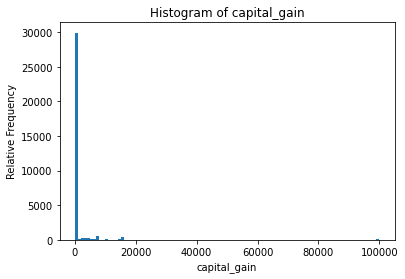

In [17]:
# Plot histogram of capital_gain
plt.hist(income94.capital_gain, bins = 100)
plt.title('Histogram of capital_gain')
plt.xlabel('capital_gain')
plt.ylabel('Relative Frequency')
plt.show()

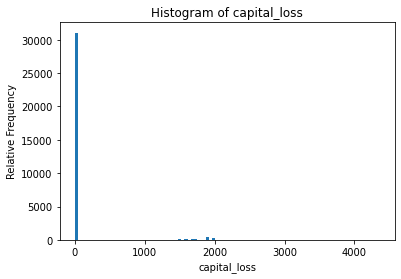

In [18]:
# Plot histogram of capital_loss
plt.hist(income94.capital_loss, bins = 100)
plt.title('Histogram of capital_loss')
plt.xlabel('capital_loss')
plt.ylabel('Relative Frequency')
plt.show()

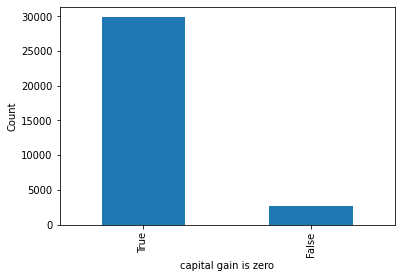

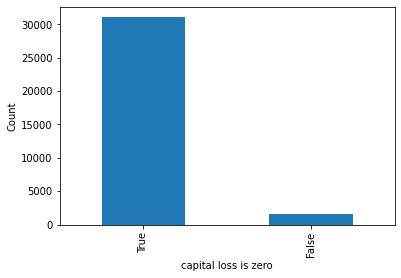

In [19]:
# assign to True if capital_gain takes value integer 0, False otherwise
income94['capital_gain_zero'] = income94['capital_gain'] == 0
# assign to True if capital_gain takes value integer 0, False otherwise. 
income94['capital_loss_zero'] = income94['capital_loss'] == 0

# bar plot for capital_gain_zero (with y being value counts)
income94['capital_gain_zero'].value_counts().plot(kind = 'bar')
plt.xlabel('capital gain is zero')
plt.ylabel('Count')
plt.show()
# bar plot for capital_loss_zero (with y being value counts)
income94['capital_loss_zero'].value_counts().plot(kind = 'bar')  
plt.xlabel('capital loss is zero')
plt.ylabel('Count')
plt.show()

####4)

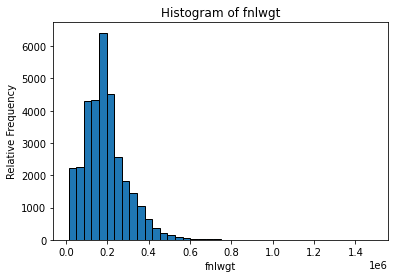

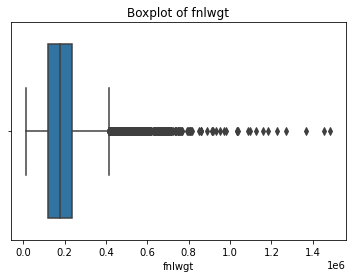

In [20]:
# Plot histogram of fnlwgt
plt.hist(income94.fnlwgt, bins = 40, edgecolor='black')
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Relative Frequency')
plt.show()

# Plot boxplot of fnlwgt
sns.boxplot(x = 'fnlwgt', data = income94)
plt.xlabel('fnlwgt')
plt.title('Boxplot of fnlwgt')
plt.show()

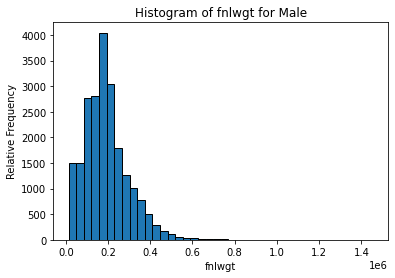

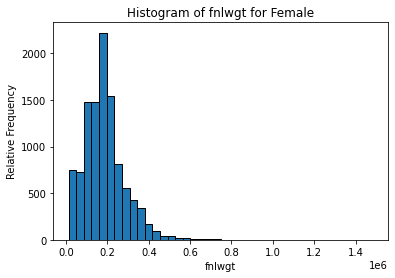

In [21]:
# Extract data observation with sex == 'Male', and make the hitorgram of fnlwgt
income94_male = income94[income94.sex == ' Male']
plt.hist(income94_male.fnlwgt, bins = 40, edgecolor='black')
plt.title('Histogram of fnlwgt for Male')
plt.xlabel('fnlwgt')
plt.ylabel('Relative Frequency')
plt.show()

# Extract data observation with sex == 'Female', and make the hitorgram of fnlwgt
income94_female = income94[income94.sex == ' Female']
plt.hist(income94_female.fnlwgt, bins = 40, edgecolor='black')
plt.title('Histogram of fnlwgt for Female')
plt.xlabel('fnlwgt')
plt.ylabel('Relative Frequency')
plt.show()

In [22]:
##############################################
##### function get_outliers is from lab2 #####
def get_outliers(num_var, df):
  '''Get outliers based on the 1.5*IQR rule.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)

  # Generate IQR
  iqr = thirdquart - firstquart

  # Generate the boundary for an outlier (ie. the whiskers of the plot)
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr

  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  print('The variable {} has {} outliers'.format(num_var, len(outliers)))
  return outliers
##############################################

# Save outliers
outliers = get_outliers('fnlwgt', income94)

# Replace the outlier values with missing value (np.nan)
income94['fnlwgt'].loc[outliers.index] = np.nan

The variable fnlwgt has 992 outliers


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Correlation

####1a)  


In [23]:
# Extract 3 corresponding columns, and make a correlation matrix to see the coefficients
income94_sub = income94[['age', 'education_num', 'hours_per_week']]
income94_sub.corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


####1b)

In [38]:
# Conduct pearson correlation test between variable hours_per_week, and education_num 
stat, p = stats.pearsonr(income94['hours_per_week'], income94['education_num'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.148, p=0.000


#### 1c)

In [39]:
# Using the male subset of the dataframe to conduct the pearson correlation test
# to get the correlation coefficent and the p-value
male_stat, male_p = stats.pearsonr(income94_male['education_num'], income94_male['age'])
print('stat=%.3f, p=%.3f' % (male_stat, male_p))

stat=0.060, p=0.000


In [26]:
# Using the female subset of the dataframe to conduct the pearson correlation test
# to get the correlation coefficent and the p-value
female_stat, female_p = stats.pearsonr(income94_female['education_num'], income94_female['age'])
print('stat=%.3f, p=%.3f' % (female_stat, female_p))

stat=-0.018, p=0.063


#### 1d)

In [27]:
# Extract the data with only two variables investigated, and then compute cov matrix
income_sub = income94[['education_num', 'hours_per_week']]
income_sub.cov()

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


## Regression

#### 1a)

In [40]:
# model (i), with only sex as dependent variable
reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        06:26:10   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

#### 1b)

In [29]:
# model (ii), newly introduced education_num as control/dependent variable
reg2 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        06:18:34   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

#### 1c)

In [41]:
# model (iii), newly introduced gross_income_group as dependent variable
reg3 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        06:26:18   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [31]:
# Compute and print RSE of the three models, to compare models
print("The RSE of model (i) is " + str(reg1.mse_resid))
print("The RSE of model (ii) is " + str(reg2.mse_resid))
print("The RSE of model (iii) is " + str(reg3.mse_resid)) 

The RSE of model (i) is 144.44672793675824
The RSE of model (ii) is 141.23145178884275
The RSE of model (iii) is 138.09108966554098


In [32]:
# Compute and print RMSE of the three models, to compare models
print("The RSE of model (i) is " + 
      str(reg1.mse_resid*np.sqrt((income94.shape[0]-2)/income94.shape[0])))
print("The RSE of model (ii) is " +
      str(reg2.mse_resid*np.sqrt((income94.shape[0]-2)/income94.shape[0])))
print("The RSE of model (iii) is " +
      str(reg3.mse_resid*np.sqrt((income94.shape[0]-2)/income94.shape[0])))

The RSE of model (i) is 144.44229168031345
The RSE of model (ii) is 141.227114280149
The RSE of model (iii) is 138.08684860383437


# Part III


In [46]:
# Fit a new regression, with only gross_income_group as dependent variable and 
# hours_per_week as independent (predicted) variable
own_reg = smf.ols('hours_per_week ~ gross_income_group', data = income94).fit()
print(own_reg.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:39:03   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         